-- Production Companies analyzed based on their employment of Star Trek Guest Actors. 
-- 

In [23]:
# Import Needy Files

import json
import star_trek_tos_data as TOS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [24]:
# Define descriptin and title lists

description = []
title = []

# Loop and append empty lists 
for movie_id in TOS.guest_movies:
    movie_dat = TOS.guest_movies[movie_id]
    
    # print(movie_dat)
    try:
        description.append(movie_dat['overview'])
        title.append(movie_dat['original_title'])
        
    except KeyError:
        print('Error')

Error


In [25]:
df = pd.DataFrame({'Movie Title': title,
                  'Description': description})
len(df)

3936

In [26]:
df['Description'].replace('', np.nan, inplace=True)
df.dropna(subset=['Description'], inplace=True)
title_clean = df['Movie Title']

In [27]:
# Do the sentimetns analysis 

sentiments = {}

compound = []
positive = []
negative = []
neutral = []
    
for text in df['Description']:
    
    results = analyzer.polarity_scores(text)
    com = results["compound"]
    pos = results["pos"]
    neg = results["neg"]
    neu = results["neu"]
            
    compound.append(com)
    positive.append(pos)
    negative.append(neg)
    neutral.append(neu)
    
sentiments=(compound, positive, negative, neutral)

In [28]:
the_data = {'Compound': sentiments[0],
           'Positive': sentiments[1],
           'Negative': sentiments[2],
           'Neutral': sentiments[3],
            'Movie Title': title_clean, 
               }

In [29]:
senti_data = pd.DataFrame(the_data)

In [30]:
# Set up Sentiments dictionary columns 
columns = ['Compound', 'Positive', 'Negative', 'Neutral']

the_data = pd.DataFrame(columns = columns)


In [31]:
# Create a dictionary that holds number of start trak guest actors who were employed by productions companies. 

dic = {}

for movie_id in TOS.guest_movies:
    movie_dat = TOS.guest_movies[movie_id]
    
    # print(json.dumps(movie_dat, indent = 4, sort_keys =True))
    
    try:
        movie_dat['production_companies']
        
        movie_dat['overview']
        
        for movie_co in movie_dat['production_companies']:
            movie_co['name']
        
            if movie_co['name'] not in dic:
                dic[movie_co['name']] = 0
            dic[movie_co['name']] += len(movie_dat['guest_ids'])
    except KeyError:
        print('Error')

Error


In [32]:
dic['Walter Wanger Productions']

5

In [33]:
dic

{'Universal International Pictures (UI)': 114,
 'Columbia Pictures Corporation': 157,
 'Orbit Productions': 3,
 'Columbia Pictures': 54,
 'Katzman Corporation': 1,
 'Ross Hunter Productions Inc.': 4,
 'Carrollton Inc.': 2,
 'George Axelrod Productions': 2,
 'Sunset Productions': 2,
 'Warner Bros.': 273,
 'United Artists': 80,
 'Mirisch Corporation, The': 5,
 'jackson-weston productions': 1,
 'Ladd Enterprises': 4,
 'Metro-Goldwyn-Mayer (MGM)': 307,
 'United Pictures': 7,
 'Gramercy Pictures': 2,
 'RKO Radio Pictures': 85,
 'Monogram Pictures': 32,
 'Argosy Pictures': 3,
 'Bryna Productions': 9,
 'Graffiti Productions': 1,
 'Security Pictures': 8,
 'Theodora Productions': 2,
 'Twentieth Century Fox Film Corporation': 247,
 'MCL Films S.A.': 1,
 'Walwa Films S.A.': 1,
 'Mark Hellinger Productions': 3,
 'United States Pictures': 5,
 'Fryman Enterprises': 3,
 'Eagle-Lion Films': 5,
 'Charles Martin Productions': 2,
 'Alta Vista Productions': 7,
 'American International Pictures (AIP)': 51,

In [34]:
# Convert the dictionary above into a data frame

df = pd.DataFrame()
df['Movie Company Name'] = dic.keys()
df['Number of Actor (Star Trek)'] = dic.values()
df = df.sort_values('Number of Actor (Star Trek)', ascending = False)
df.head(50)

,Movie Company Name,Number of Actor (Star Trek)
14,Metro-Goldwyn-Mayer (MGM),307
9,Warner Bros.,273
24,Twentieth Century Fox Film Corporation,247
35,Paramount Pictures,210
81,Universal Pictures,182
1,Columbia Pictures Corporation,157
0,Universal International Pictures (UI),114
17,RKO Radio Pictures,85
10,United Artists,80
3,Columbia Pictures,54


In [35]:
# Filter the data frame 

clean_df = df.loc[df["Number of Actor (Star Trek)"] > 20]
clean_df.head()

,Movie Company Name,Number of Actor (Star Trek)
14,Metro-Goldwyn-Mayer (MGM),307
9,Warner Bros.,273
24,Twentieth Century Fox Film Corporation,247
35,Paramount Pictures,210
81,Universal Pictures,182


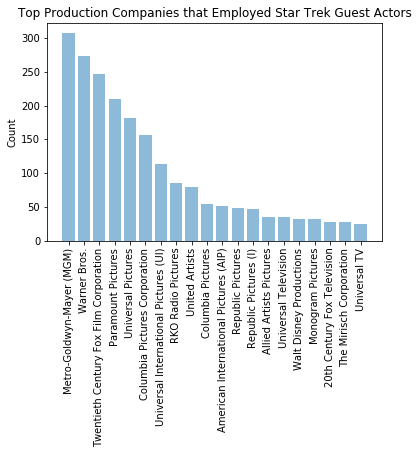

In [36]:
# Plot the filtered data frame 

objects = clean_df['Movie Company Name']

y_pos = np.arange(len(clean_df))
num = clean_df['Number of Actor (Star Trek)']
 
plt.bar(y_pos, num, align='center', alpha=0.5)
plt.xticks(y_pos, objects,  rotation='vertical')
plt.ylabel('Count')
plt.title('Top Production Companies that Employed Star Trek Guest Actors')
plt.savefig('Top 20 Produciton Companies Employed Star Trek Guest Actors')
 
plt.show()